In [1]:
# Regular EDA (exploration data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# use pandas to load data into a DataFrame
df = pd.read_csv("breast-cancer-wisconsin.data", header=None)
df.columns = ['Id', 'Clump_thickness', 'Uniformity_cell_size', 'Uniformity_cell_shape', 'Marginal_adhesion', 'Single_e_cell_size', 'Bare_nuclei', 'Bland_chromatin', 'Normal_nucleoli', 'Mitoses', 'Class']
df.shape # (rows, columns)

(699, 11)

In [5]:
target_column = 'Class'

In [6]:
df.head()

,Id,Clump_thickness,Uniformity_cell_size,Uniformity_cell_shape,Marginal_adhesion,Single_e_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [31]:
# Create a boolean mask where True indicates the presence of '?' in the element
mask = df.applymap(lambda x: '?' in str(x))

# Use the mask to get the rows and columns where '?' is present
rows, cols = np.where(mask)

# Iterate over the rows and columns to get the index labels and column names
for row, col in zip(rows, cols):
    print(f'Index: {df.index[row]}, Column: {df.columns[col]}')

Index: 23, Column: Bare_nuclei
Index: 40, Column: Bare_nuclei
Index: 139, Column: Bare_nuclei
Index: 145, Column: Bare_nuclei
Index: 158, Column: Bare_nuclei
Index: 164, Column: Bare_nuclei
Index: 235, Column: Bare_nuclei
Index: 249, Column: Bare_nuclei
Index: 275, Column: Bare_nuclei
Index: 292, Column: Bare_nuclei
Index: 294, Column: Bare_nuclei
Index: 297, Column: Bare_nuclei
Index: 315, Column: Bare_nuclei
Index: 321, Column: Bare_nuclei
Index: 411, Column: Bare_nuclei
Index: 617, Column: Bare_nuclei


In [34]:
df = df.replace('?', np.nan)

In [35]:
# Potability is the target variable, how many of each class are there?
df[target_column].value_counts()

Class
2    458
4    241
Name: count, dtype: int64

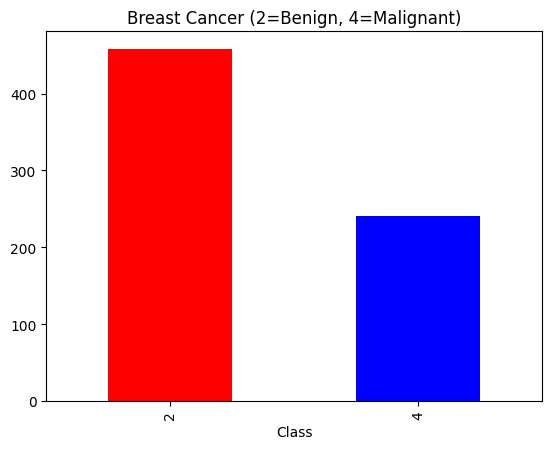

In [36]:
df[target_column].value_counts().plot(kind="bar", color=["red", "blue"], title = "Breast Cancer (2=Benign, 4=Malignant)");

In [9]:
# (1998/(1998+1278))*100 # jumlah persenan imbalance

60.98901098901099

In [10]:
# 1998-1278 # jumlah data imbalance

720

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Id                     699 non-null    int64 
 1   Clump_thickness        699 non-null    int64 
 2   Uniformity_cell_size   699 non-null    int64 
 3   Uniformity_cell_shape  699 non-null    int64 
 4   Marginal_adhesion      699 non-null    int64 
 5   Single_e_cell_size     699 non-null    int64 
 6   Bare_nuclei            683 non-null    object
 7   Bland_chromatin        699 non-null    int64 
 8   Normal_nucleoli        699 non-null    int64 
 9   Mitoses                699 non-null    int64 
 10  Class                  699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [38]:
df.describe() # bisa melihat variabel 'count' terkecil untuk mengetahui berapa banyak data yang NaN
# count terkecil terletak pada Sulfate 2945

,Id,Clump_thickness,Uniformity_cell_size,Uniformity_cell_shape,Marginal_adhesion,Single_e_cell_size,Bland_chromatin,Normal_nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [39]:
df.isna().sum() # dari sini juga terlihat

Id                        0
Clump_thickness           0
Uniformity_cell_size      0
Uniformity_cell_shape     0
Marginal_adhesion         0
Single_e_cell_size        0
Bare_nuclei              16
Bland_chromatin           0
Normal_nucleoli           0
Mitoses                   0
Class                     0
dtype: int64

### klasifikasi akan susah dilakukan jika box plot mirip. Contoh boxplot yang bagus adalah iris dataset.
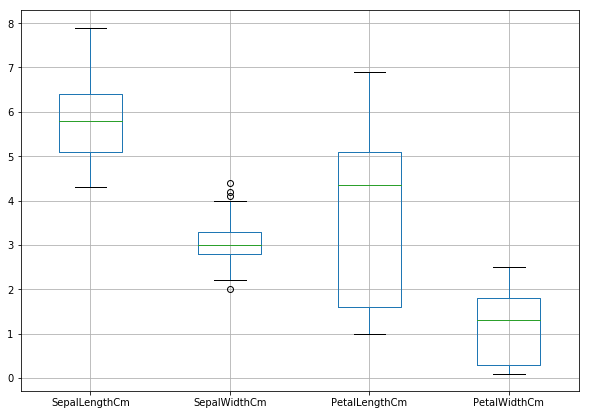

In [14]:
column_list = list(df.columns)
column_list = column_list[:-1]
column_list

['Id',
 'Clump_thickness',
 'Uniformity_cell_size',
 'Uniformity_cell_shape',
 'Marginal_adhesion',
 'Single_e_cell_size',
 'Bare_nuclei',
 'Bland_chromatin',
 'Normal_nucleoli',
 'Mitoses']

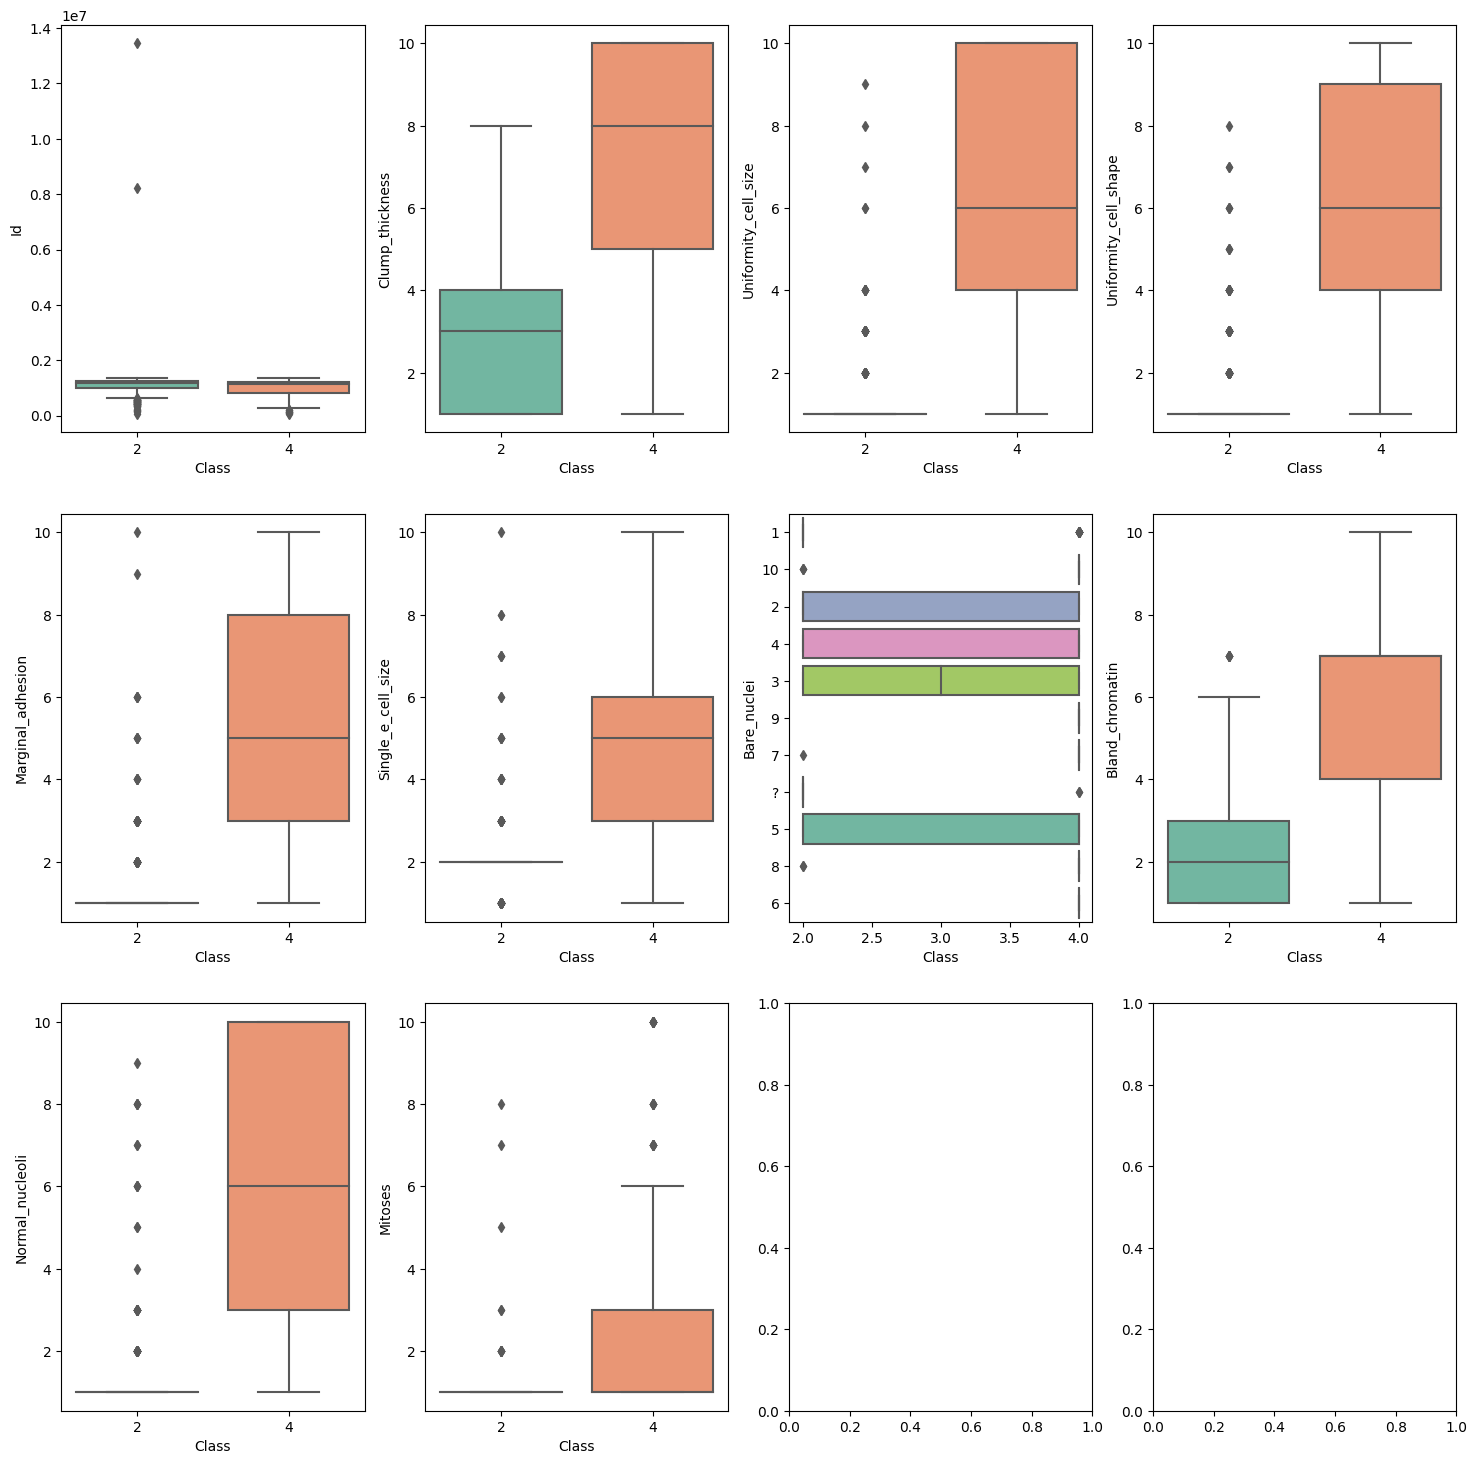

In [15]:
row, col = 3, 4
fig, axes = plt.subplots(row, col, figsize=(18, 18))
i, j = 0, 0
for z, column in enumerate(column_list):
    sns.boxplot(ax=axes[i,j], data=df, palette="Set2", x=target_column, y=column_list[z])
    if j == col-1:
        j = 0
        i += 1
    else:
        j += 1

### Distribusi data setiap fitur dengan histograms

In [16]:
target_list = df[target_column].value_counts()
target_list = target_list.index.tolist()
target_list

[2, 4]

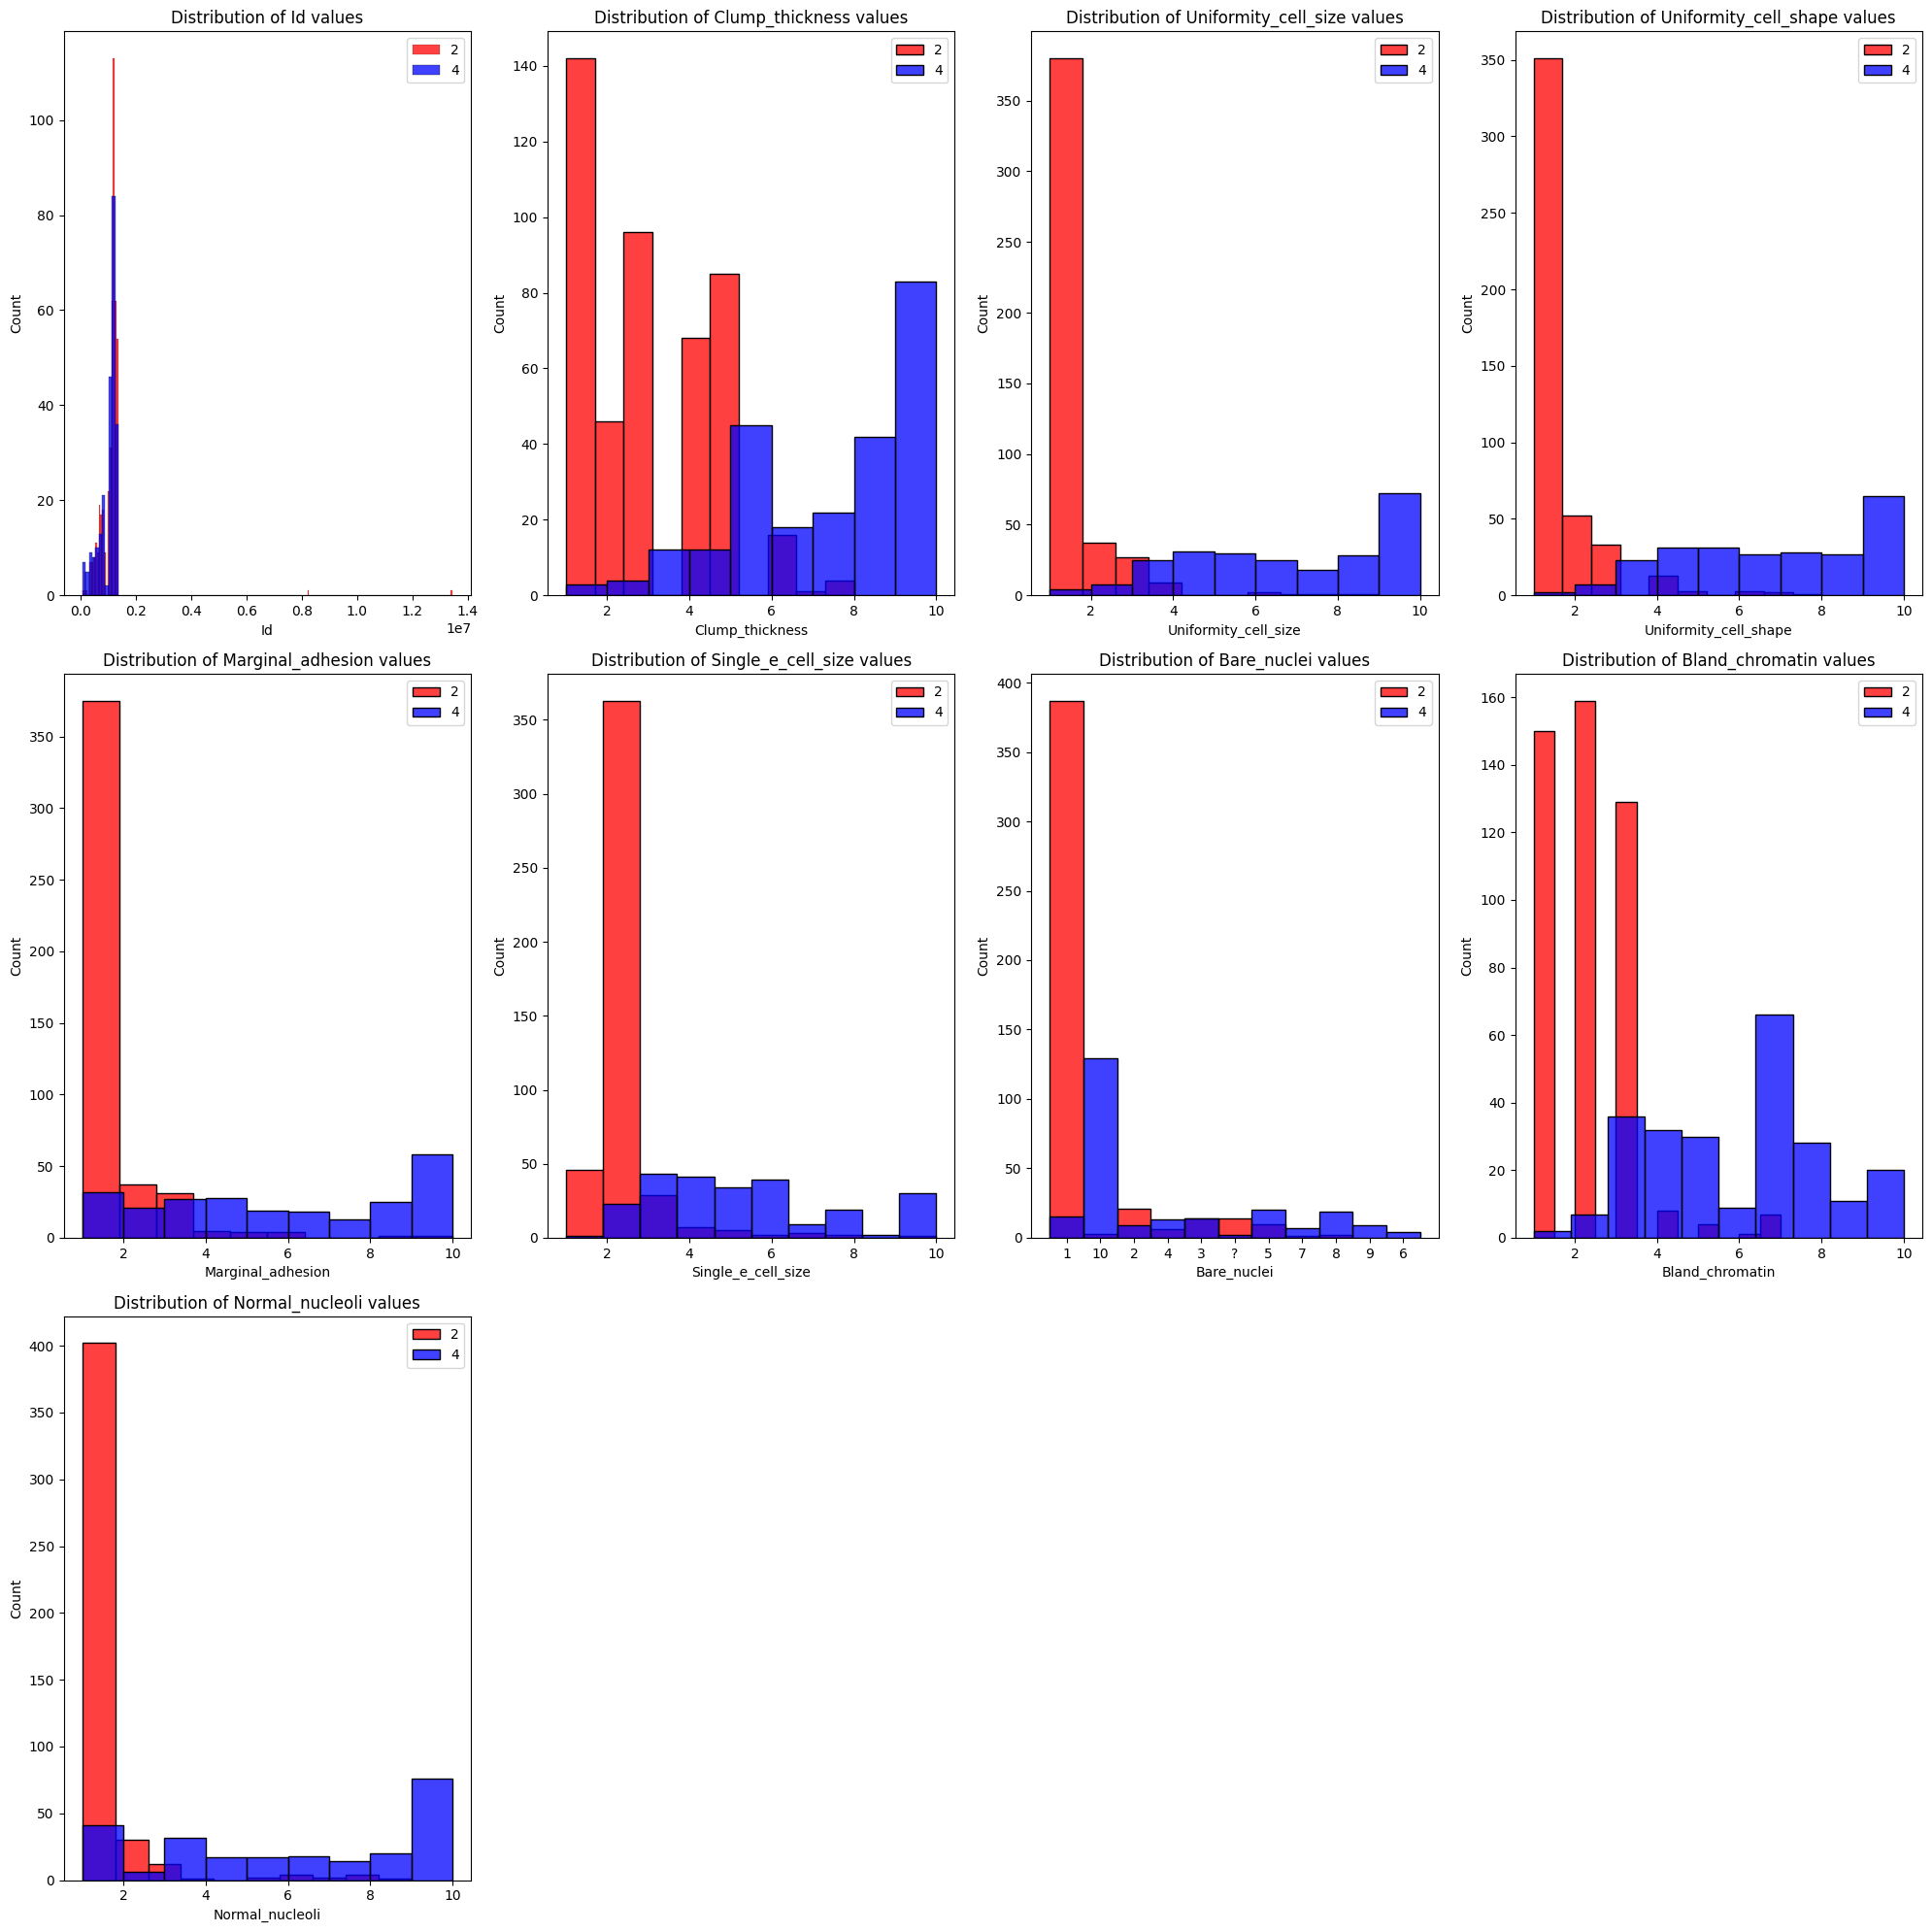

In [17]:
# Distribution of features

target_value = []

for target in target_list:
    query = str(target_column) + ' == ' + str(target)
    target_value.append(df.query(query))

# colors = ['salmon', 'red', 'blue', 'lightblue', 'orange', 'black', 'gray', 'pink', 'navy', 'white']
colors = ['red', 'blue']

fig = plt.figure(figsize=(20,20))

for ax,column in enumerate(df.columns[:9]):
    plt.subplot(3,4,ax+1)
    plt.title(f'Distribution of {column} values')
    for i, target in enumerate(target_value):
        sns.histplot(x=target[column],label=target_list[i], color=colors[i])    
    plt.legend(prop=dict(size=10))

    
plt.tight_layout()

### Correlation Matrix

- apakah variable punya ketergantungan atau tidak
- Kalo korelasinya 1: berkorelasi, negatif: tidak ada korelasinya 
- BAGUS KALO POSITIF ATAU NEGATIF, KALO 0 → tidak ada korelasinya

#### Correlation Matrix yang baik

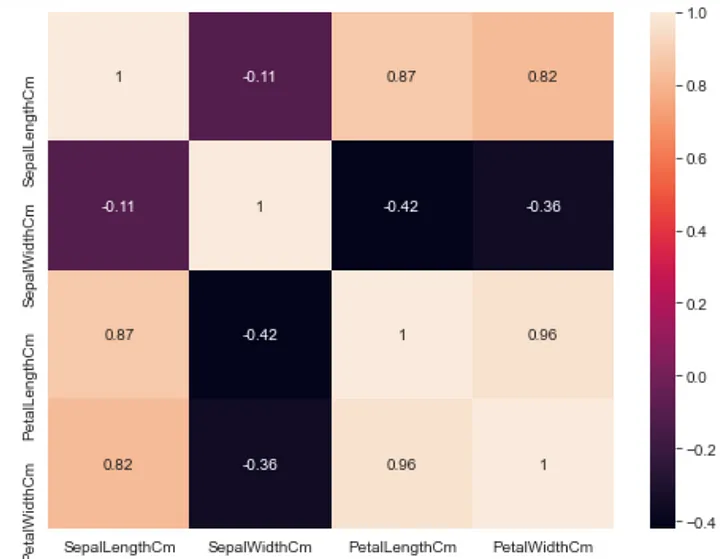

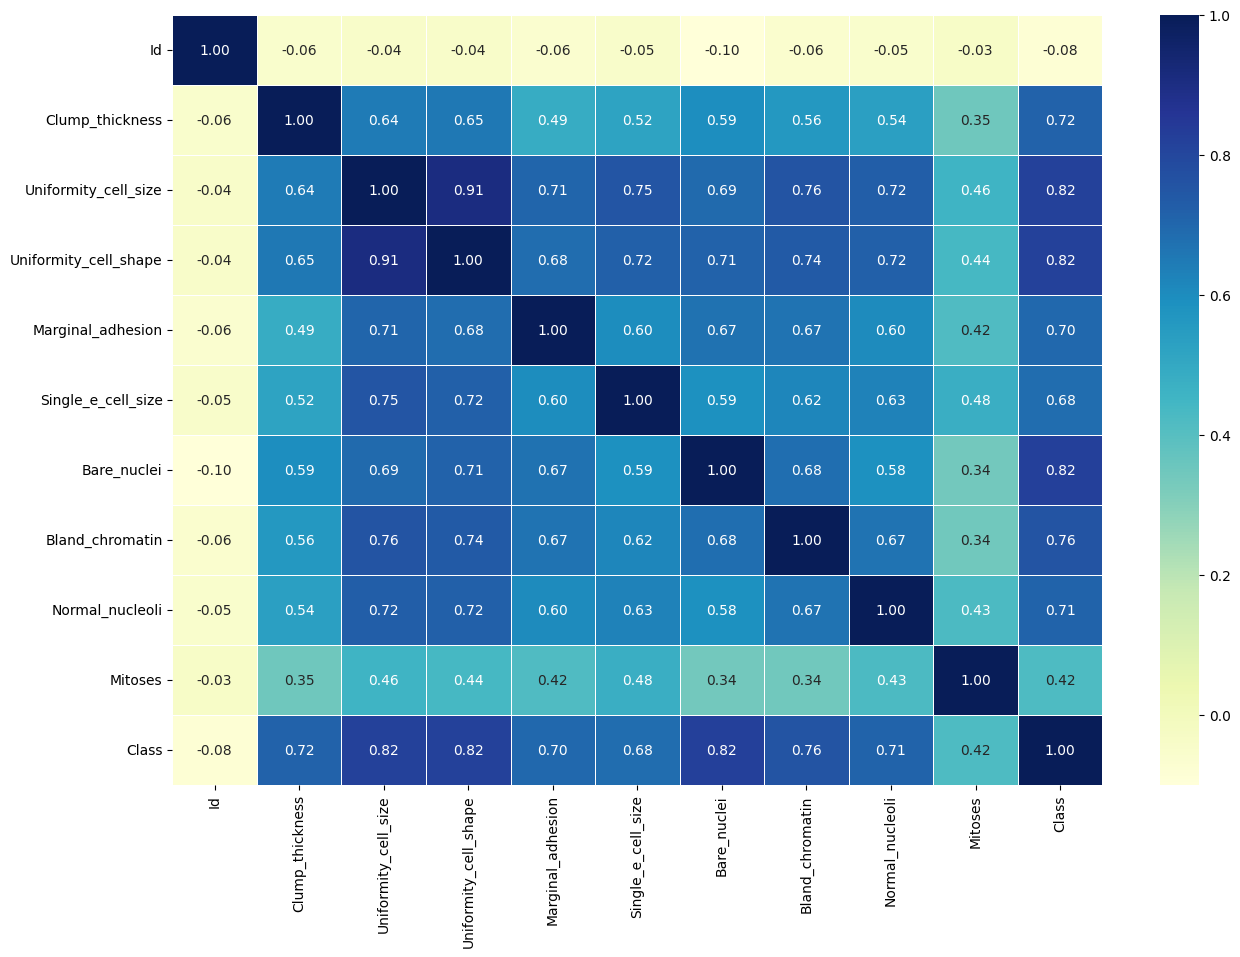

Bad pipe message: %s [b'P\xf3TV]\x07\x9c\xf4\xc10]\xa8?\xdc\xb8^\x1cX \xce:\xecz\x95af\x80K\xd0\x19\xce\xbf\xb4\xd9\x00\x00[x\xe2\x9eq\xe4\x16#\x07pK\xb96!J\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06\x01\x00+\x00\x03\x02\x03', b'-\x00\x02']
Bad pipe message: %s [b'\x80\x05h\x89\xec\x17VY`]\x87R\xaa\xe0\xae\xee\xca\x84 xA\xe2t\xd8\xb8\xe7(\xbc\xe5\x18\xaa\xf0C\xdf=\xd3\xf6o\xbd|\xea\xd6\xcd\xd4\xa7\xc7\xf4R\xa3\xe6\xc7\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n']
Bad pipe message: %s [b'\x86\x8e\xb59\x0e\xc3w)\xc2\xe6b9\xf4\xfeq\x1e\x1d1\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\x

In [41]:
# Use Seaborn to make a correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");

### Scatter Plot

Melihat pesebaran data dengan x_axis=Sulfate dan y_axis=Solids, karena meliaht korelasi dari data tersebut

<Axes: xlabel='Sulfate', ylabel='Solids'>

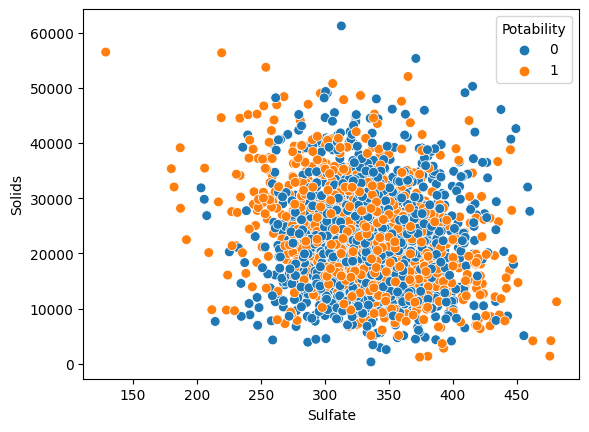

In [19]:
sns.scatterplot(x=df['Sulfate'], y=df['Solids'], hue=df['Potability'], s=50)

### Export to CSV

In [40]:
df.to_csv('breast_cancer.csv', index=False)